## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",400)
pd.set_option("display.width",1000)
pd.set_option("display.max_rows",400)

## Reading Data

In [2]:
#Reading the data using pandas
new_appl=pd.read_csv("C:/Users/luqmn/Downloads/Credit EDA Case Study-20211025T111150Z-001\Credit EDA Case Study/application_data.csv")
prev_appl=pd.read_csv("C:/Users/luqmn/Downloads/Credit EDA Case Study-20211025T111150Z-001/Credit EDA Case Study/previous_application.csv")

## Checking Data of New Application

In [3]:
new_appl.shape

(307511, 122)

In [4]:
#Displays the summary about new application data 
new_appl.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Checking Data of Previous Application

In [5]:
prev_appl.shape

(1670214, 37)

In [6]:
#Displays the summary about Previous application data 
prev_appl.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Checking the Percentage of Null Values in each Column

In [7]:
# Display the null percetange of each column in new apllication data
round(new_appl.isnull().mean()*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [8]:
# Creating new data frame "new_appl_1" having columns with less than or equal to 50% null values
new_appl_1=new_appl.loc[:,new_appl.isnull().mean()<=0.5]

In [9]:
new_appl_1.isnull().mean().sort_values(ascending=False)

FLOORSMAX_AVG                   0.497608
FLOORSMAX_MODE                  0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
NAME_TYPE_SUITE                 0.004201
DEF_30_CNT_SOCIAL_CIRCLE        0.003320
OBS_60_CNT_SOCIAL_CIRCLE        0.003320
DEF_60_CNT_SOCIAL_CIRCLE        0.003320
OBS_30_CNT_SOCIAL_CIRCLE        0.003320
EXT_SOURCE_2                    0.002146
AMT_GOODS_PRICE                 0.000904
AMT_ANNUITY                     0.000039
CNT_FAM_MEMBERS 

## Imputing Null Values

In [10]:
# checking values less than equal to 12% of mising values
list(new_appl_1.columns[(new_appl_1.isnull().mean()<=0.12) & (new_appl_1.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

## 1.Imputing Column "AMT_ANNUITY"

In [11]:
new_appl_1["AMT_ANNUITY"]

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

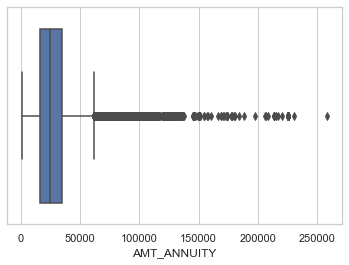

In [12]:
sns.set_theme(style="whitegrid")
sns.boxplot(new_appl_1["AMT_ANNUITY"])

As the  outliers are present  median can be used to impute null values instead of mean

In [13]:
new_appl_1["AMT_ANNUITY"].median()


24903.0

In [14]:
new_appl_1["AMT_ANNUITY"].fillna(new_appl_1["AMT_ANNUITY"].median(),inplace=True)

In [15]:
new_appl_1["AMT_ANNUITY"].isnull().value_counts()

False    307511
Name: AMT_ANNUITY, dtype: int64

## 2.Imputing Column "NAME_TYPE_SUITE"

In [16]:
new_appl_1["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
new_appl_1["NAME_TYPE_SUITE"].isnull().value_counts()

False    306219
True       1292
Name: NAME_TYPE_SUITE, dtype: int64

In [18]:
# As it is a categorical variable we are imputing the null values with mode
new_appl_1["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace=True)

In [19]:
new_appl_1["NAME_TYPE_SUITE"].isnull().value_counts()

False    307511
Name: NAME_TYPE_SUITE, dtype: int64

## 3.Imputing Column "CNT_FAM_MEMBERS"

In [20]:
new_appl_1["CNT_FAM_MEMBERS"].isnull().value_counts()

False    307509
True          2
Name: CNT_FAM_MEMBERS, dtype: int64

In [21]:
new_appl_1["CNT_FAM_MEMBERS"]

0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: float64

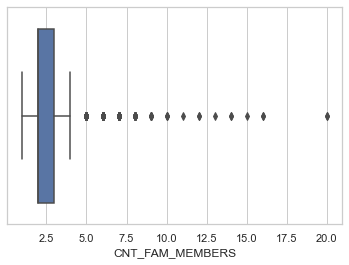

In [22]:
sns.boxplot(new_appl_1["CNT_FAM_MEMBERS"])
plt.show()

As the outliers are present median can be used to impute null values instead of mean

In [23]:
new_appl_1["CNT_FAM_MEMBERS"].median()

2.0

In [24]:
new_appl_1["CNT_FAM_MEMBERS"].fillna(new_appl_1["CNT_FAM_MEMBERS"].median(),inplace=True)

In [25]:
new_appl_1["CNT_FAM_MEMBERS"].isnull().value_counts()

False    307511
Name: CNT_FAM_MEMBERS, dtype: int64

## 4.Imputing Column " AMT_GOODS_PRICE"

In [26]:
new_appl_1["AMT_GOODS_PRICE"].isnull().value_counts()

False    307233
True        278
Name: AMT_GOODS_PRICE, dtype: int64

In [27]:
new_appl_1["AMT_GOODS_PRICE"]

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

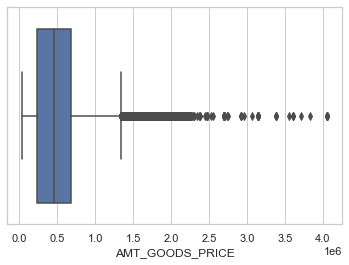

In [28]:
sns.boxplot(new_appl_1["AMT_GOODS_PRICE"])
plt.show()

As the outliers are present median can be used to impute null values instead of mean

In [29]:
new_appl_1["AMT_GOODS_PRICE"].median()

450000.0

In [30]:
new_appl_1["AMT_GOODS_PRICE"].fillna(new_appl_1["AMT_GOODS_PRICE"].median(),inplace=True)

In [31]:
new_appl_1["AMT_GOODS_PRICE"].isnull().value_counts()

False    307511
Name: AMT_GOODS_PRICE, dtype: int64

## 5.Imputing Column "EXT_SOURCE_2"

In [32]:
new_appl_1["EXT_SOURCE_2"].isnull().value_counts()

False    306851
True        660
Name: EXT_SOURCE_2, dtype: int64

In [33]:
new_appl_1["EXT_SOURCE_2"]

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

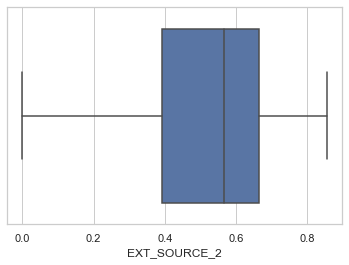

In [34]:
sns.boxplot(new_appl_1["EXT_SOURCE_2"])
plt.show()

As there are no outliers present we will be imputing missing values with mean

In [35]:
new_appl_1["EXT_SOURCE_2"].mean()

0.5143926741308463

In [36]:
new_appl_1["EXT_SOURCE_2"].fillna(new_appl_1["EXT_SOURCE_2"].mean(),inplace=True)

In [37]:
new_appl_1["EXT_SOURCE_2"].isnull().value_counts()

False    307511
Name: EXT_SOURCE_2, dtype: int64

In [38]:
# checking shape of new_appl_1 data
new_appl_1.shape

(307511, 81)

## Standardising Data Type

In [39]:
convert_object=list(new_appl_1.select_dtypes(include="object").columns)
convert_object

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [40]:
# convert object into strings
new_appl_1.loc[:,convert_object]=new_appl_1.loc[:,convert_object].apply(lambda x:x.astype(str,errors="ignore"))

In [41]:
new_appl_1['EMERGENCYSTATE_MODE'].dtypes

dtype('O')

In [42]:
new_appl_1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Binning Variables

### 1.Binning "AMT_INCOME_TOTAL"

In [43]:
new_appl_1["AMT_INCOME_TOTAL"].describe()


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
new_appl_1["AMT_INCOME_TOTAL"].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [45]:
new_appl_1["Income_Cohort"]=pd.qcut(new_appl_1["AMT_INCOME_TOTAL"],q=([0,0.1,0.3,0.6,0.8,1]),labels=['Lowest','Low','Medium','High','Highest'])

In [46]:
new_appl_1["Income_Cohort"]

0            High
1         Highest
2          Lowest
3          Medium
4          Medium
           ...   
307506     Medium
307507     Lowest
307508     Medium
307509       High
307510     Medium
Name: Income_Cohort, Length: 307511, dtype: category
Categories (5, object): ['Lowest' < 'Low' < 'Medium' < 'High' < 'Highest']

## 2.Binning "DAYS_BIRTH"

In [47]:
# Creating "AGE" column from "DAYS_BIRTH"
new_appl_1['AGE']=abs(new_appl_1["DAYS_BIRTH"])//365


In [48]:
new_appl_1['AGE'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [49]:
# As the AGE ranges from 20 to 69 we can create bins of 5 from 20 to 71
new_appl_1['AGE_COHORT'] = pd.cut(new_appl_1['AGE'],bins=np.arange(20,71,5))

## Creating "Credit_TotalInc_ Ratio" Column

In [50]:
new_appl_1["Credit_TotalInc_ Ratio"]=round((new_appl_1["AMT_CREDIT"]/new_appl_1["AMT_INCOME_TOTAL"]))

In [51]:
new_appl_1["Credit_TotalInc_ Ratio"]

0         2.0
1         5.0
2         2.0
3         2.0
4         4.0
         ... 
307506    2.0
307507    4.0
307508    4.0
307509    2.0
307510    4.0
Name: Credit_TotalInc_ Ratio, Length: 307511, dtype: float64

In [52]:
new_appl_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Cohort,AGE,AGE_COHORT,Credit_TotalInc_ Ratio
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,25,"(20, 25]",2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Highest,45,"(40, 45]",5.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Lowest,52,"(50, 55]",2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,52,"(50, 55]",2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,54,"(50, 55]",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [53]:
# percentage of social circle who defaulted after 30 days
new_appl_1['SOCIAL_DEF_30']=new_appl_1['DEF_30_CNT_SOCIAL_CIRCLE']/new_appl_1['OBS_30_CNT_SOCIAL_CIRCLE']

In [54]:
# percentage of social circle who defaulted after 60 days
new_appl_1['SOCIAL_DEF_60']=new_appl_1['DEF_60_CNT_SOCIAL_CIRCLE']/new_appl_1['OBS_60_CNT_SOCIAL_CIRCLE']

## Checking distribution of values in "Target" column

In [55]:
new_appl_1["TARGET"].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

So around 8% of client have payment difficulties and 92% of clients dont have payment difficulties.

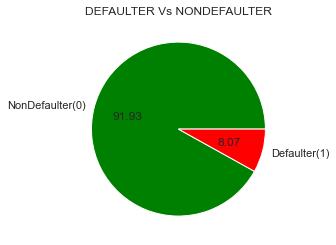

In [56]:
plt.pie(new_appl_1["TARGET"].value_counts(normalize=True)*100,labels=["NonDefaulter(0)","Defaulter(1)"],autopct="%.2f",colors=["green","red"])
plt.title('DEFAULTER Vs NONDEFAULTER')
plt.show()

In [57]:

Relevant_columns= ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','Income_Cohort','AGE_COHORT','AMT_CREDIT','AMT_INCOME_TOTAL',
'Credit_TotalInc_ Ratio','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_DEF_30',
'SOCIAL_DEF_60','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [58]:
new_appl_1=new_appl_1[Relevant_columns]

In [59]:
new_appl_1

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Income_Cohort,AGE_COHORT,AMT_CREDIT,AMT_INCOME_TOTAL,Credit_TotalInc_ Ratio,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,SOCIAL_DEF_30,SOCIAL_DEF_60,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_CONTRACT_TYPE,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
0,100002,1,M,N,Y,High,"(20, 25]",406597.5,202500.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,-637,-3648.0,0,Laborers,1.0,2,Business Entity Type 3,1.0,1.0,0.0,0.0,0.0,Cash loans,24700.5,2,351000.0
1,100003,0,F,N,N,Highest,"(40, 45]",1293502.5,270000.0,5.0,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0
2,100004,0,M,Y,Y,Lowest,"(50, 55]",135000.0,67500.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,-225,-4260.0,0,Laborers,1.0,2,Government,NaN,NaN,0.0,0.0,0.0,Revolving loans,6750.0,2,135000.0
3,100006,0,F,N,Y,Medium,"(50, 55]",312682.5,135000.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,0,Laborers,2.0,2,Business Entity Type 3,0.0,0.0,NaN,NaN,NaN,Cash loans,29686.5,2,297000.0
4,100007,0,M,N,Y,Medium,"(50, 55]",513000.0,121500.0,4.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3038,-4311.0,0,Core staff,1.0,2,Religion,NaN,NaN,0.0,0.0,0.0,Cash loans,21865.5,2,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,M,N,N,Medium,"(20, 25]",254700.0,157500.0,2.0,Working,Secondary / secondary special,Separated,With parents,-236,-8456.0,0,Sales staff,1.0,1,Services,NaN,NaN,NaN,NaN,NaN,Cash loans,27558.0,1,225000.0
307507,456252,0,F,N,Y,Lowest,"(55, 60]",269550.0,72000.0,4.0,Pensioner,Secondary / secondary special,Widow,House / apartment,365243,-4388.0,0,nan,1.0,2,XNA,NaN,NaN,NaN,NaN,NaN,Cash loans,12001.5,2,225000.0
307508,456253,0,F,N,Y,Medium,"(40, 45]",677664.0,153000.0,4.0,Working,Higher education,Separated,House / apartment,-7921,-6737.0,1,Managers,1.0,3,School,0.0,0.0,0.0,1.0,0.0,Cash loans,29979.0,3,585000.0
307509,456254,1,F,N,Y,High,"(30, 35]",370107.0,171000.0,2.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-4786,-2562.0,0,Laborers,2.0,2,Business Entity Type 1,NaN,NaN,0.0,0.0,0.0,Cash loans,20205.0,2,319500.0


## Dividing dataframe into Defaulters(1) and Non-Defaulters(0)

In [60]:
non_default=new_appl_1[new_appl_1.TARGET==0]
default=new_appl_1[new_appl_1.TARGET==1]

In [61]:
default.shape

(24825, 30)

In [62]:
non_default.shape

(282686, 30)

## Univariate-Analysis


In [63]:
# Creating plot function to display graph for categorical variables
def count_plot(v):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=v, data=non_default,ax=ax1,palette="deep")
    ax1.set_ylabel('Total_Counts_non_defaulters')
    ax1.set_title(f'Distribution of {v} for Non-Defaulters',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
    
    # Annotate function 
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(non_default))*100), (p.get_x(), p.get_height()))
        
    sns.countplot(x=v, data=default,ax=ax2,palette="deep")
    ax2.set_ylabel('Total_Counts_Defaulters')
    ax2.set_title(f'Distribution of {v} for Defaulters',fontsize=20)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(default))*100), (p.get_x(), p.get_height()))
    
    plt.show()

## To Check and Compare the types of income for defaulters and Non-Defaulters

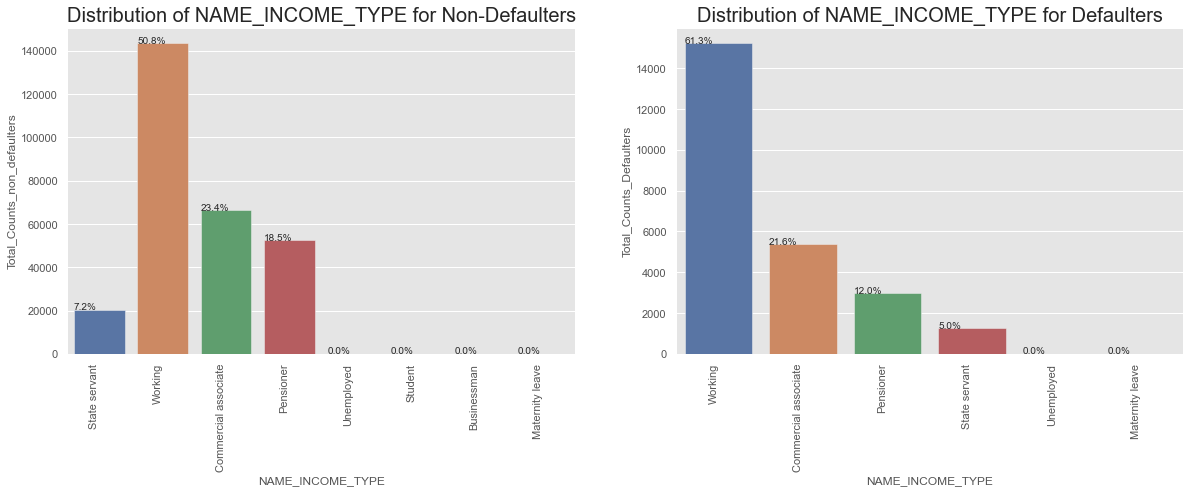

In [64]:
count_plot('NAME_INCOME_TYPE')


1.We can observe from the defaulters graph that the student and buisnessman category arent presetnt,hence we can conclude that these two categories dont default.

2.Working category contributes equally to defaulters and non-defaulters 

## To Check and Compare the Housing types for defaulters and Non-Defaulters

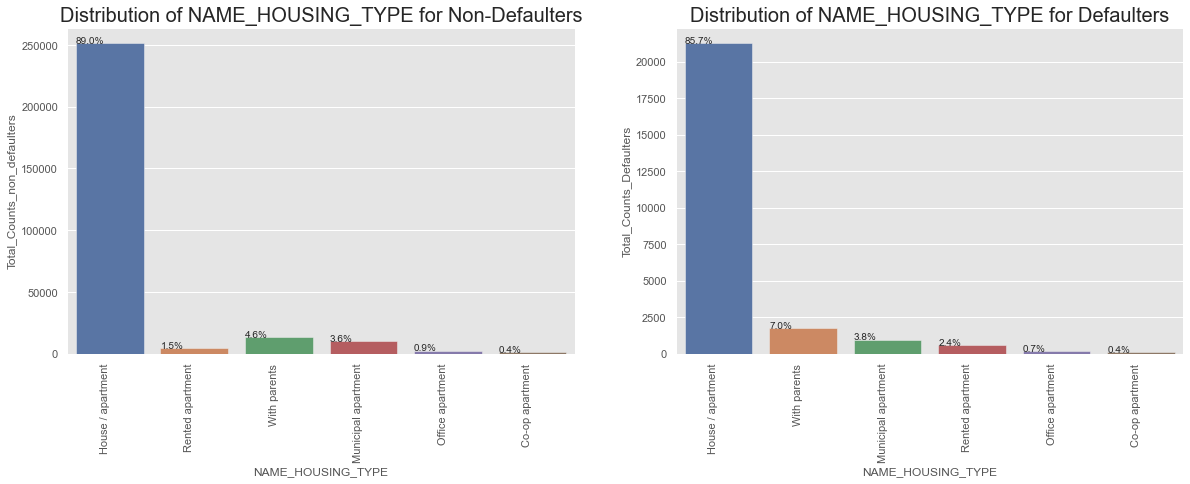

In [65]:
count_plot('NAME_HOUSING_TYPE')

1.Most of the People living in apartment and house apply for loan.

2.People living with their parents tend to default more.

3.People living in muncipal apartment and rented apartmeent are equally likely to default.

## To Check and Compare the Family Statuses for Defaulters and Non-Defaulters

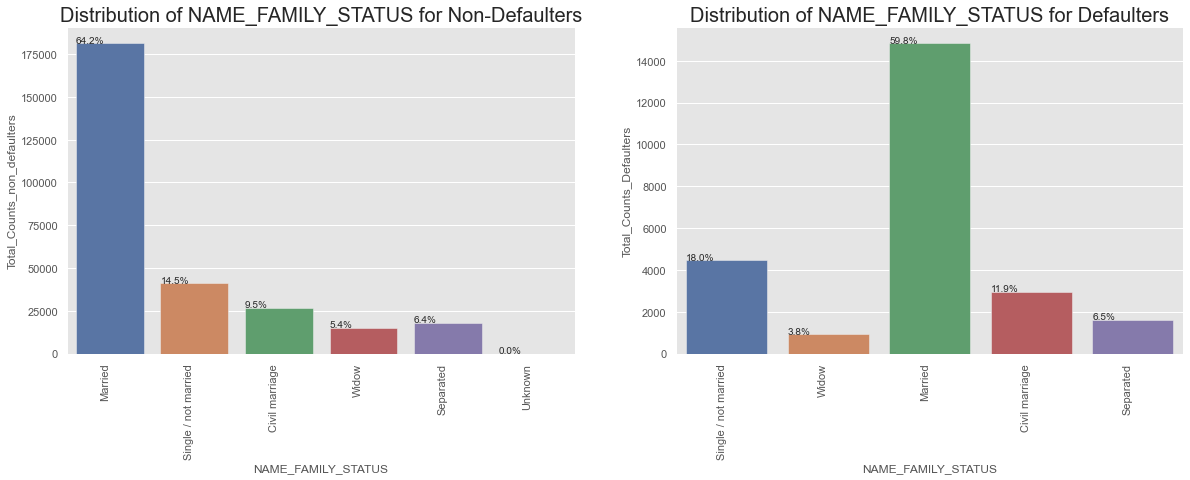

In [66]:
count_plot('NAME_FAMILY_STATUS')

1.Single/Unmarried people are the 2nd highest category who are most likely to default compared to other categories.

2.Married people applied for most number of loans hence it is high in both defaulter and non-defaulter.

## To Check and Compare the type of Education for Defaulters and Non-Defaulters

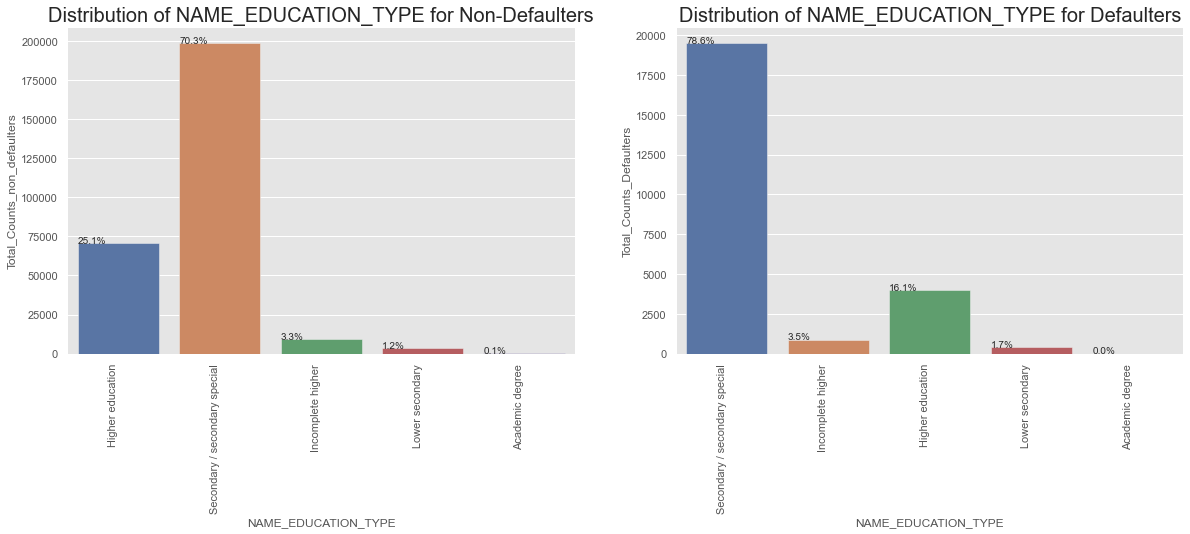

In [67]:
count_plot('NAME_EDUCATION_TYPE')

1.We can observe from above ploted graph that the people whose highest  education is secondary/secondary special have applied for the loan the most.

2.People whose highest education is higher education are less likely to default.

## Distribution of Code Gender for Def & Non Defaulter

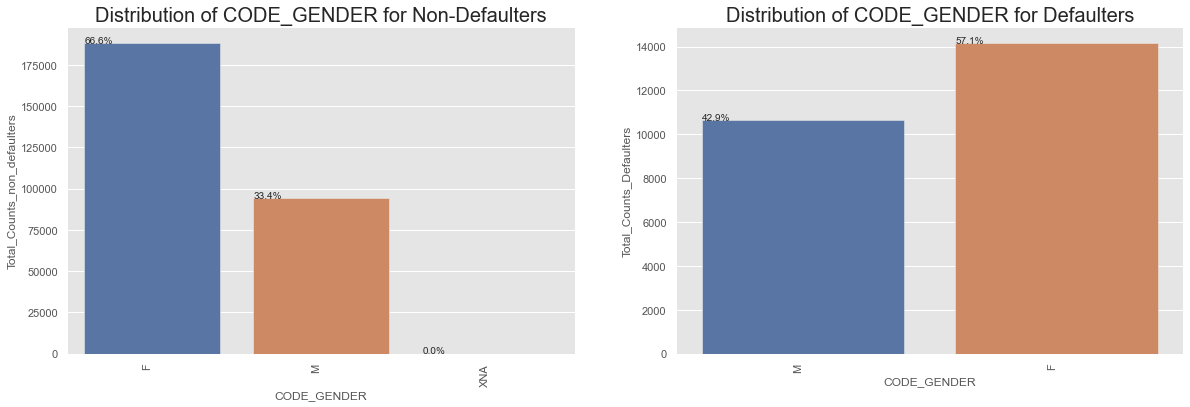

In [68]:
count_plot('CODE_GENDER')

In [69]:
# Since we dont have much information on  "XNA" category,so we have excluded "XNA" 
non_default=non_default[non_default['CODE_GENDER']!='XNA']
default=default[default['CODE_GENDER']!='XNA']


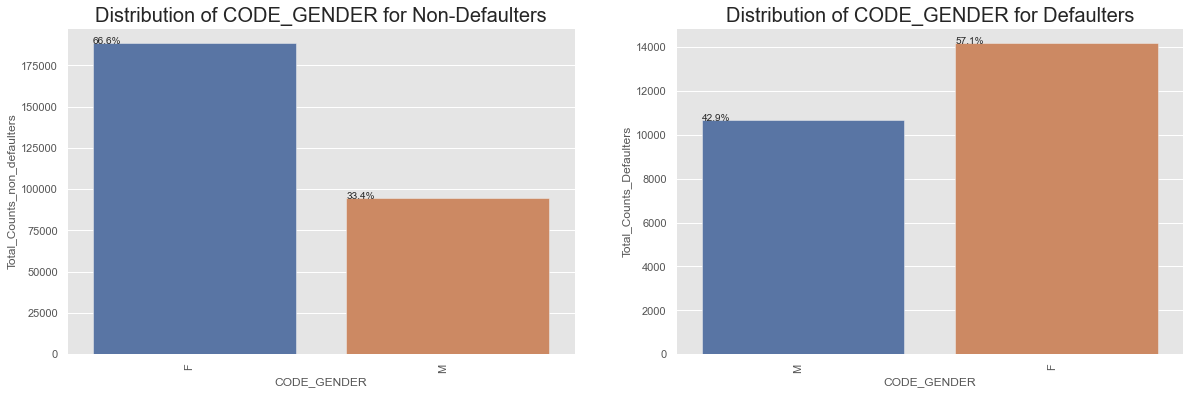

In [70]:
count_plot('CODE_GENDER')

1.Females tend to default the least

2.Females also apply for more number of loans than males


## To Check and Compare the Clients based on their Region Rating for Defaulters and Non-Defaulters

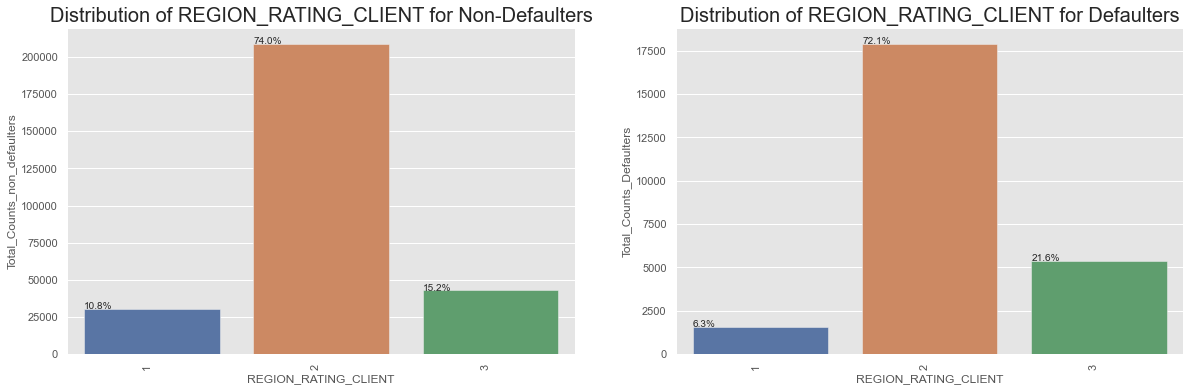

In [71]:
count_plot('REGION_RATING_CLIENT')

1.People from tier 3 city are mostly likely to default more due to either low income or unemployment.

2.We can observe that the majority of the loan applicants are from Tier 2 City.

## To Check if the person having a  car is a defaulter or not

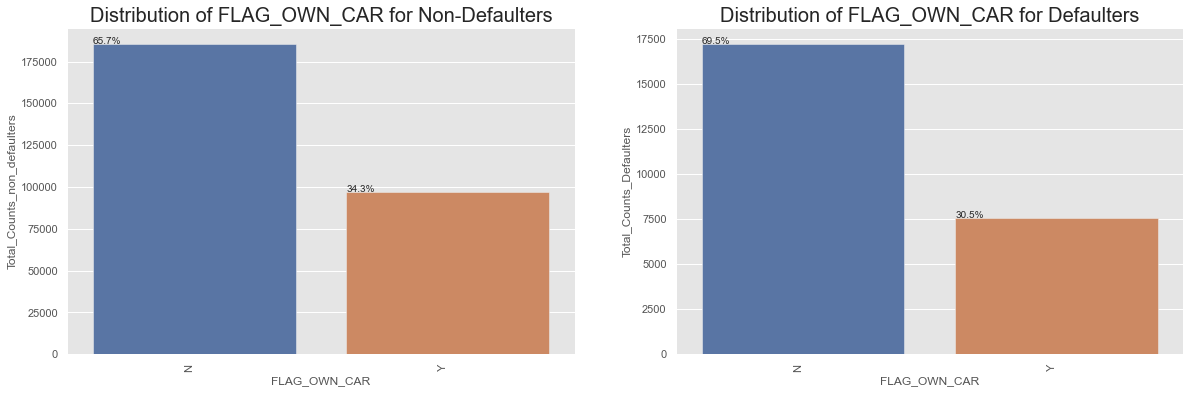

In [72]:
count_plot("FLAG_OWN_CAR")

We can observe from the above plotted graphs that the non-defaulters owning a car are above 175000 and the people owning a car being a defaulter are less than 17500 and hence we can conclude that the more number of non-defaulters own a car.

## To Check and Compare the age groups for Defaulters and Non-Defaulters

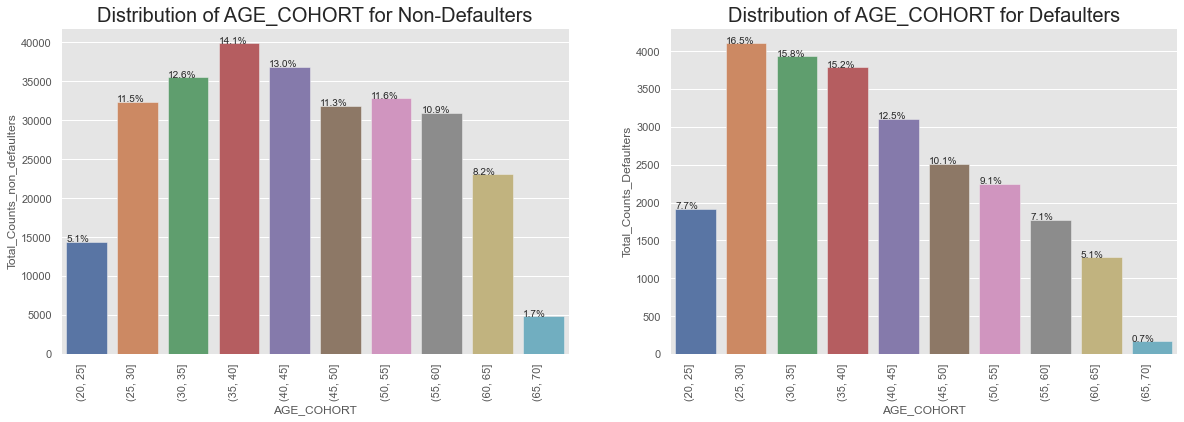

In [73]:
count_plot('AGE_COHORT')

1.We can observe from the defaulters graph that as the age group increases the number of people who default decreases.

2.People of age group 25 to 30 are most likely to default cause they might be unemployed .

## To Check and Compare the Income groups for Defaulters and Non-Defaulters

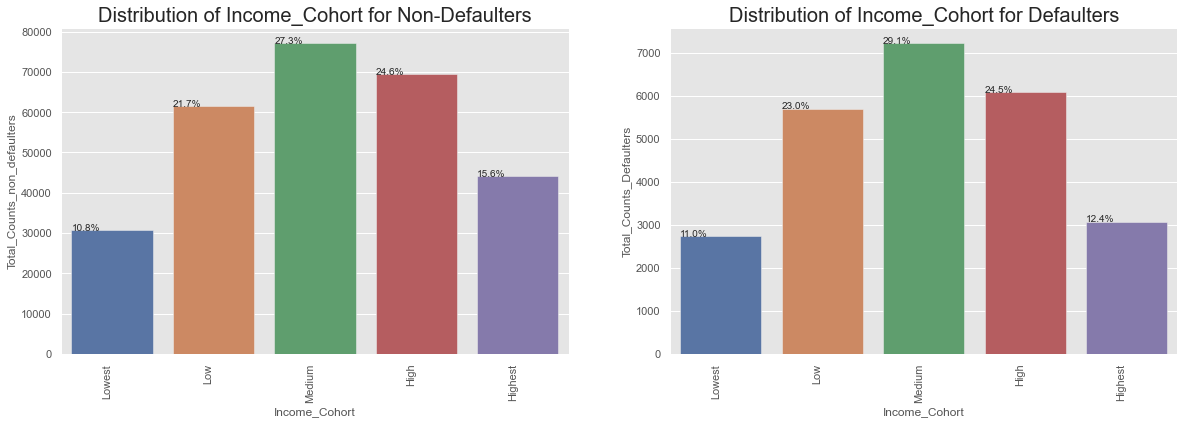

In [74]:
count_plot('Income_Cohort')

1.People with lowest income tend to default the least.

2.People having medium income tend to apply for loan the most.


## To Check number of family members for Defaulters and Non-Defaulters

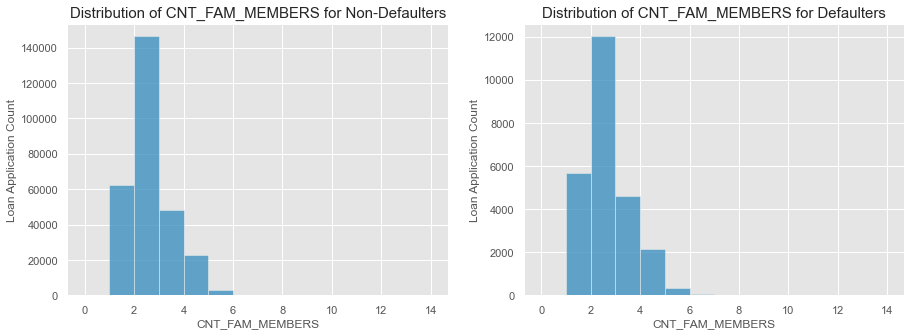

In [75]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.histplot(non_default['CNT_FAM_MEMBERS'],ax=ax1,bins=range(15))
ax1.set_title(f'Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
ax1.set_xlabel('CNT_FAM_MEMBERS')
ax1.set_ylabel('Loan Application Count')

sns.histplot(default['CNT_FAM_MEMBERS'],ax=ax2,bins=range(15))
ax2.set_title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
ax2.set_xlabel('CNT_FAM_MEMBERS')
ax2.set_ylabel('Loan Application Count')  

plt.show()

So from the above graph we can say that the family of 3 members are most likely to apply for loan compared to other number of family members.

## Checking Co-relations between columns

In [76]:
# Top 10 correlation in non_default data frame
corl=non_default.corr()
corl_0= corl.where(np.triu(np.ones(corl.shape),k=1).astype(np.bool)).unstack().reset_index()
corl_0.columns=['Col1','Col2','Corr_Coeff']
corl_0.dropna(subset=['Corr_Coeff'],inplace=True)
corl_0['Corr_Abs']=corl_0['Corr_Coeff'].abs()
corl_0 = corl_0.sort_values(by=['Corr_Abs'], ascending=False)
corl_0.head(10)

,Col1,Col2,Corr_Coeff,Corr_Abs
308,AMT_GOODS_PRICE,AMT_CREDIT,0.987024,0.987024
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148,0.950148
208,SOCIAL_DEF_60,SOCIAL_DEF_30,0.873003,0.873003
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421,0.776421
272,AMT_ANNUITY,AMT_CREDIT,0.771296,0.771296
74,Credit_TotalInc_ Ratio,AMT_CREDIT,0.648589,0.648589
310,AMT_GOODS_PRICE,Credit_TotalInc_ Ratio,0.628732,0.628732
273,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418949,0.418949
274,AMT_ANNUITY,Credit_TotalInc_ Ratio,0.391498,0.391498
309,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349425,0.349425


1.We can observe from the above table that there is high co-relation between AMT_GOODS_PRICE and AMT_CREDIT,as the goods price increases the loan amount credited for those goods also increases.

2.There is very low co-relation between AMT_GOODS_PRICE and	AMT_INCOME_TOTAL,as income total does not depend on goods price or vice-versa.



In [77]:
?sns.heatmap

In [78]:
corrs=non_default.corr()

<AxesSubplot:>

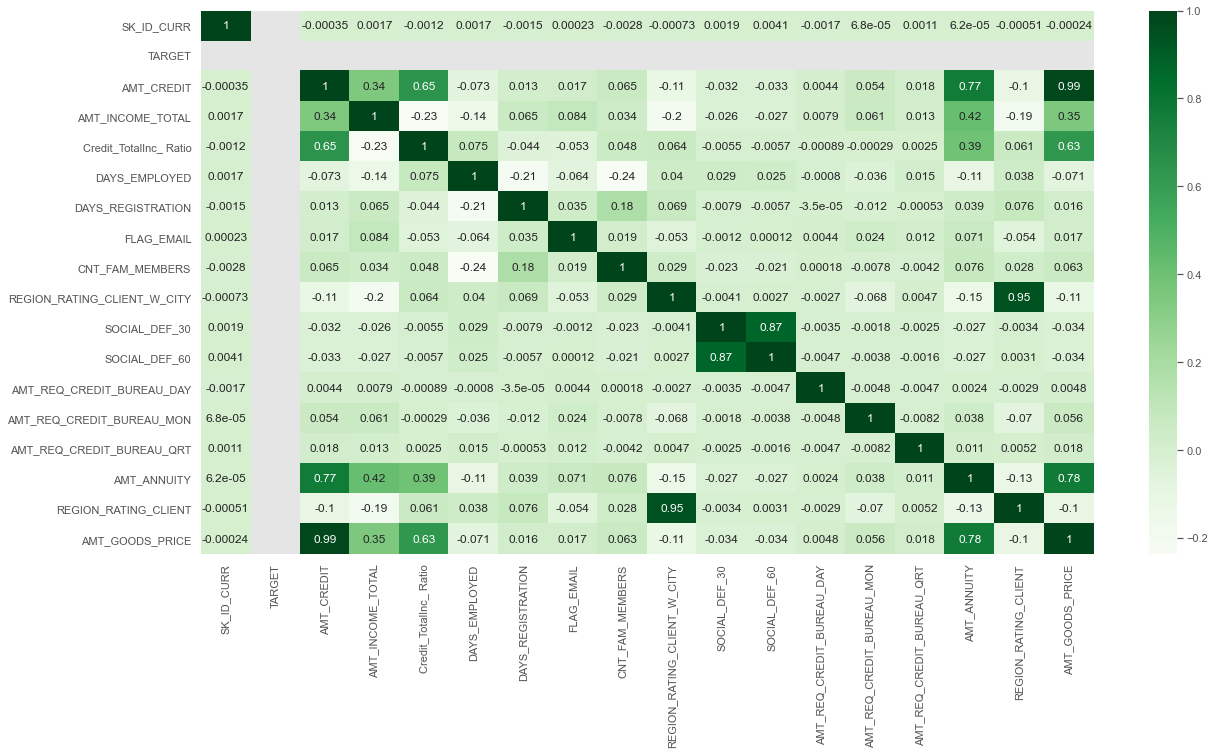

In [79]:
# Corelation for Non-Defaulters
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrs,annot=True,cmap="Greens",annot_kws={'size': 12})

In [80]:
# Top 10 correlation in default data frame
corle=default.corr()
corl_1= corle.where(np.triu(np.ones(corle.shape),k=1).astype(np.bool)).unstack().reset_index()
corl_1.columns=['Col1','Col2','Corr_Coeff']
corl_1.dropna(subset=['Corr_Coeff'],inplace=True)
corl_1['Corr_Abs']=corl_1['Corr_Coeff'].abs()
corl_1 = corl_1.sort_values(by=['Corr_Abs'], ascending=False)
corl_1.head(10)

,Col1,Col2,Corr_Coeff,Corr_Abs
308,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
208,SOCIAL_DEF_60,SOCIAL_DEF_30,0.874562,0.874562
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
272,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
74,Credit_TotalInc_ Ratio,AMT_CREDIT,0.639744,0.639744
310,AMT_GOODS_PRICE,Credit_TotalInc_ Ratio,0.623100,0.623100
274,AMT_ANNUITY,Credit_TotalInc_ Ratio,0.381298,0.381298
113,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561


1.We can observe from the above table that there is high co-relation between AMT_GOODS_PRICE and AMT_CREDIT,as the goods price increases the loan amount credited for those goods also increases.

2.There is very low co-relation between CNT_FAM_MEMBERS	and DAYS_EMPLOYED,as there is no relation between number of days employed and number of family members the client has.

<AxesSubplot:>

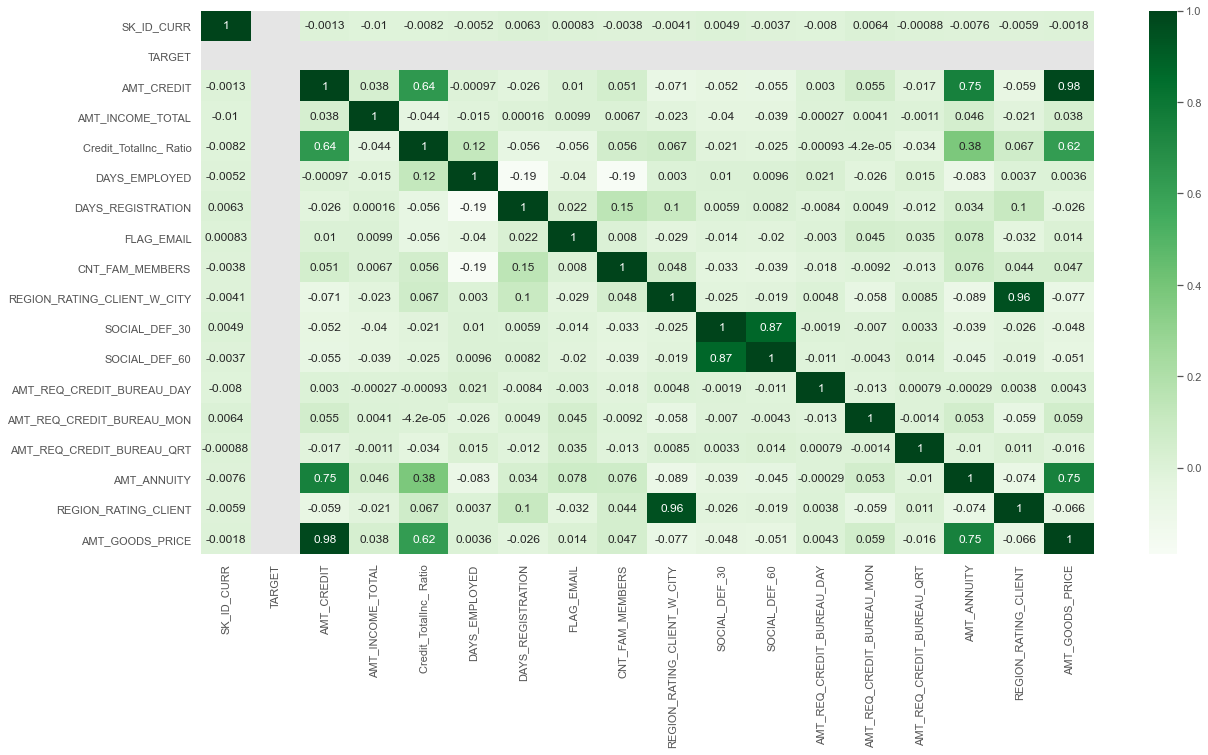

In [81]:
# Corelation for Defaulters
corrs_def=default.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrs_def,annot=True,cmap="Greens",annot_kws={'size': 12})

## Bivariate Analysis of Variables


## To Check the Income cohort based on Family Status

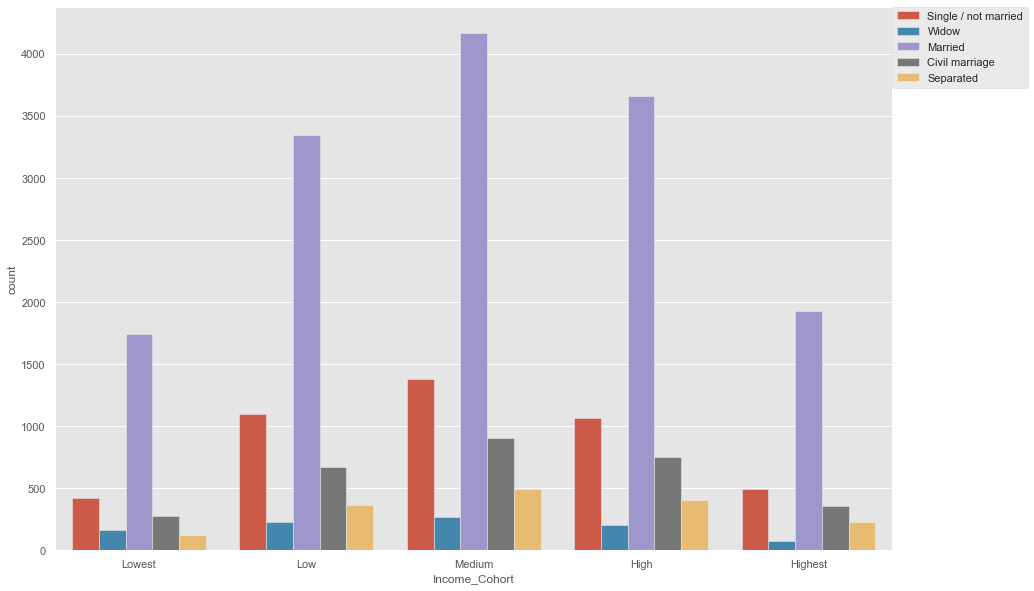

In [82]:
plt.figure(figsize=[15,10])
sns.countplot(x="Income_Cohort", data=default,hue="NAME_FAMILY_STATUS")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.show()

1.The people who are married and have medium income are most likely to default and on all the bins of income the married people are most likely to default.

2.Widows are least likely to default on all bins of income.

In [83]:
# function for scatter plot for continuous variables
def biscat(v1,v2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=v1, y=v2,data=non_default,ax=ax1,color="green")
    ax1.set_xlabel(v1)    
    ax1.set_ylabel(v2)
    ax1.set_title(f'{v1} vs {v2} for Non-Defaulters',fontsize=17)
    
    sns.scatterplot(x=v1, y=v2,data=default,ax=ax2,color="red")
    ax2.set_xlabel(v1)    
    ax2.set_ylabel(v2)
    ax2.set_title(f'{v1} vs {v2} for Defaulters',fontsize=17)
            
    plt.show()

## Comparision between AMT_GOODS_PRICE & AMT_CREDIT

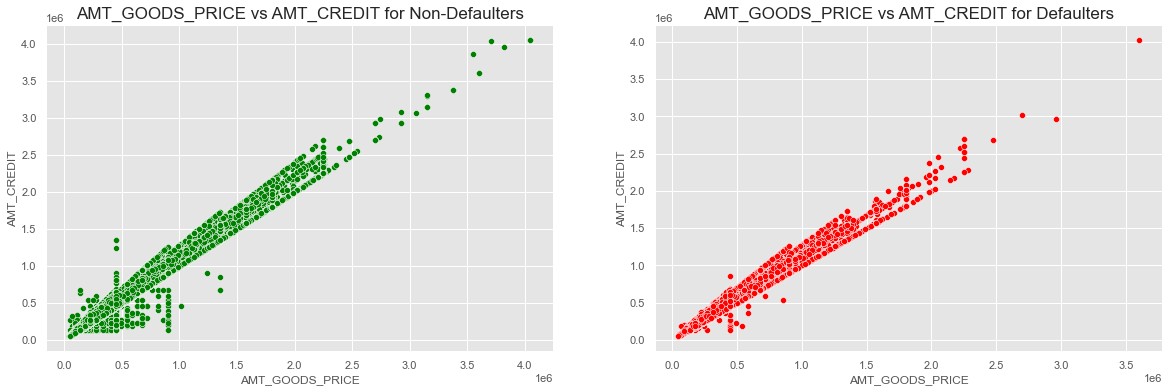

In [84]:
biscat('AMT_GOODS_PRICE','AMT_CREDIT')

The Number of Defaulters are reduced as the goods prices increases above 25 lakhs.

In [85]:
default

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Income_Cohort,AGE_COHORT,AMT_CREDIT,AMT_INCOME_TOTAL,Credit_TotalInc_ Ratio,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,SOCIAL_DEF_30,SOCIAL_DEF_60,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_CONTRACT_TYPE,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
0,100002,1,M,N,Y,High,"(20, 25]",406597.5,202500.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,-637,-3648.0,0,Laborers,1.0,2,Business Entity Type 3,1.0,1.0,0.0,0.0,0.0,Cash loans,24700.5,2,351000.0
26,100031,1,F,N,Y,Low,"(50, 55]",979992.0,112500.0,9.0,Working,Secondary / secondary special,Widow,House / apartment,-2628,-6573.0,0,Cooking staff,1.0,2,Business Entity Type 3,0.1,0.0,0.0,0.0,2.0,Cash loans,27076.5,3,702000.0
40,100047,1,M,N,Y,High,"(45, 50]",1193580.0,202500.0,6.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1262,-1182.0,0,Laborers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,2.0,0.0,Cash loans,35028.0,2,855000.0
42,100049,1,F,N,N,Medium,"(35, 40]",288873.0,135000.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-3597,-45.0,0,Sales staff,2.0,3,Self-employed,0.0,0.0,0.0,0.0,0.0,Cash loans,16258.5,3,238500.0
81,100096,1,F,N,Y,Lowest,"(65, 70]",252000.0,81000.0,3.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,-5391.0,0,nan,2.0,2,XNA,1.0,1.0,0.0,0.0,0.0,Cash loans,14593.5,2,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,M,N,N,High,"(25, 30]",450000.0,207000.0,2.0,Working,Secondary / secondary special,Married,House / apartment,-3048,-8507.0,0,Laborers,3.0,3,Business Entity Type 3,NaN,NaN,0.0,0.0,0.0,Cash loans,32746.5,3,450000.0
307475,456215,1,F,N,N,Medium,"(35, 40]",1303200.0,144000.0,9.0,Working,Higher education,Civil marriage,House / apartment,-2405,-500.0,0,Laborers,3.0,2,Construction,NaN,NaN,0.0,1.0,0.0,Cash loans,46809.0,2,1125000.0
307481,456225,1,M,N,Y,High,"(55, 60]",297000.0,225000.0,1.0,Working,Secondary / secondary special,Married,House / apartment,-3147,-8921.0,0,Managers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,0.0,0.0,Cash loans,19975.5,2,297000.0
307489,456233,1,F,N,Y,High,"(40, 45]",521280.0,225000.0,2.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-286,-8291.0,0,Sales staff,2.0,2,Business Entity Type 3,1.0,0.0,0.0,0.0,1.0,Cash loans,23089.5,2,450000.0


## Comparision between 'AMT_CREDIT' and 'CNT_FAM_MEMBERS'

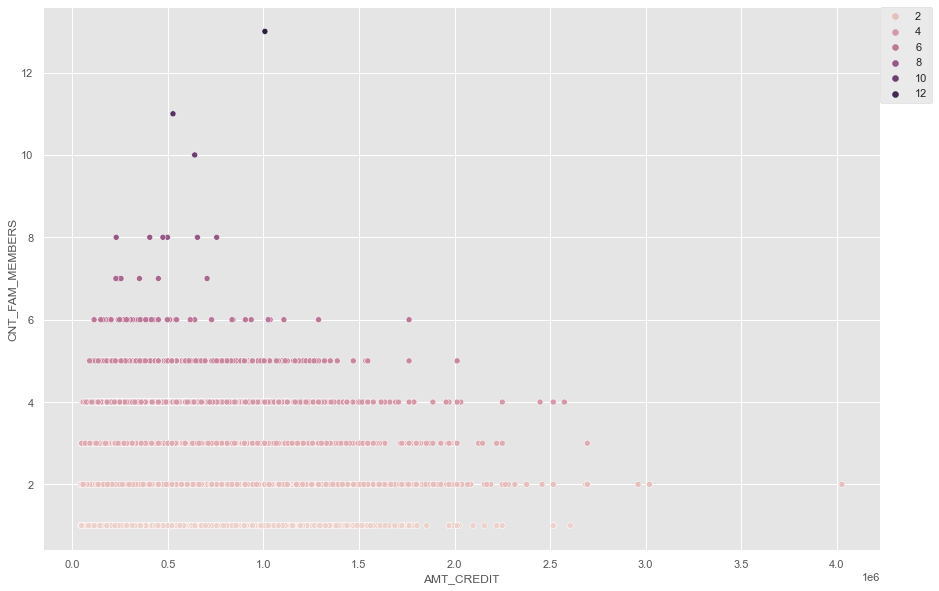

In [86]:
plt.figure(figsize=[15,10])
sns.scatterplot(x="AMT_CREDIT", data=default,y="CNT_FAM_MEMBERS",hue="CNT_FAM_MEMBERS")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.show()

1.So from the above graph we can say that as the family members increases the amount credited decreases.

2.People having more number of family members and higher credit are least likely to default.

## Checking Data for Previous Application

In [87]:
prev_appl

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [88]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [89]:
# Checking percentage of Null values of each column
(prev_appl.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [90]:
# Getting columns with null value percentage less than 50%
prev_appl=prev_appl.loc[:,prev_appl.isnull().mean()<=0.5]

In [91]:
# To check the columns fetched are having null value percentage less than 50%
(prev_appl.isnull().mean()*100).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

In [92]:
# Checking dimensions of dataframe
prev_appl.shape

(1670214, 33)

## Bivariate-Analysis

In [93]:
# Creating plot function to display graph for categorical variables
def prev_count(v):
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    sns.countplot(data=prev_appl,x=v,ax=ax,hue="NAME_CONTRACT_STATUS",palette="deep")
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {v}',fontsize=17)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.show()

## Analysis of "NAME_CLIENT_TYPE" using count plot

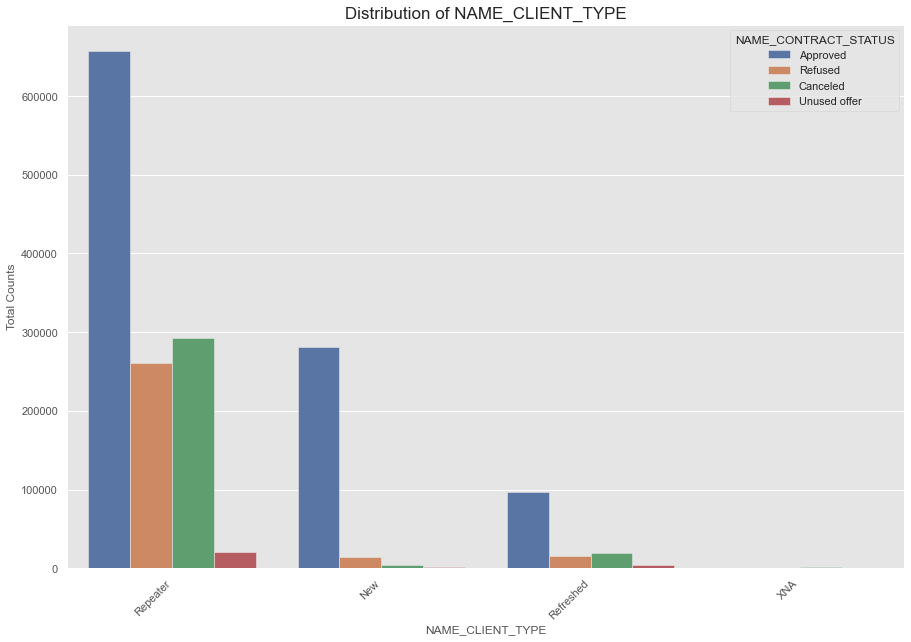

In [94]:
prev_count('NAME_CLIENT_TYPE')

1.Repeaters of the loan are approved for the new application the most.

2.New Applicants use the offers the most as the unused offer count is least for them.

In [95]:
# Numerical representaion of above graph
prev_appl.groupby(['NAME_CLIENT_TYPE',"NAME_CONTRACT_STATUS"])["NAME_CONTRACT_STATUS"].count()

NAME_CLIENT_TYPE  NAME_CONTRACT_STATUS
New               Approved                281259
                  Canceled                  3548
                  Refused                  14431
                  Unused offer              2125
Refreshed         Approved                 97100
                  Canceled                 19563
                  Refused                  15033
                  Unused offer              3953
Repeater          Approved                657844
                  Canceled                292232
                  Refused                 260860
                  Unused offer             20325
XNA               Approved                   578
                  Canceled                   976
                  Refused                    354
                  Unused offer                33
Name: NAME_CONTRACT_STATUS, dtype: int64

## Analysis of "NAME_CONTRACT_TYPE" using count plot

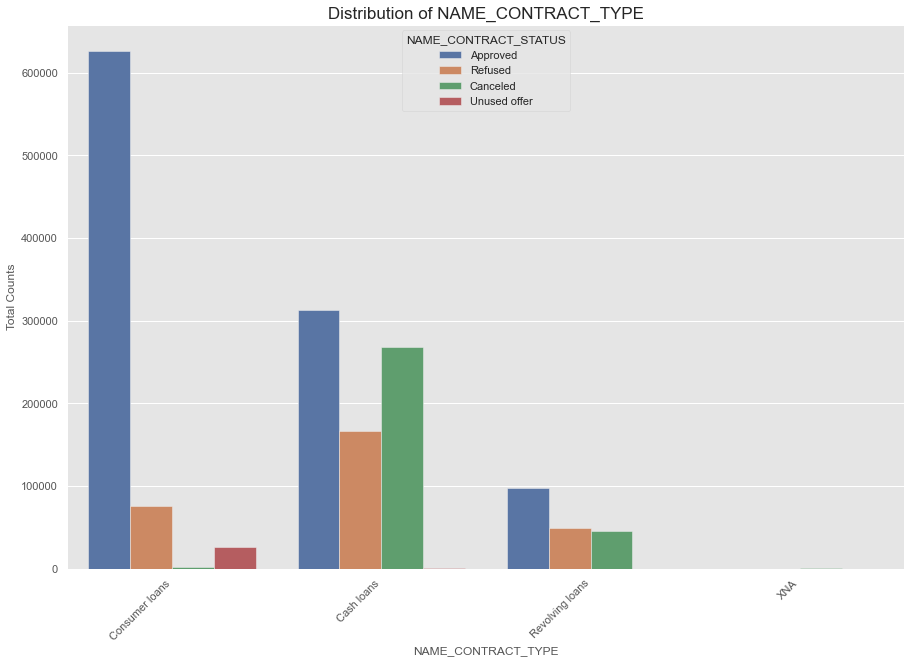

In [96]:
prev_count("NAME_CONTRACT_TYPE")

1.Consumer Loans Applications and Cash Loan applications are approved the more than revolving loans.

2.Cash Loans Applications are refused the most.

3.Consumer Loans have most unused offer.

In [97]:
# Numerical representaion of above graph
prev_appl.groupby(['NAME_CONTRACT_TYPE',"NAME_CONTRACT_STATUS"])["NAME_CONTRACT_STATUS"].count()

NAME_CONTRACT_TYPE  NAME_CONTRACT_STATUS
Cash loans          Approved                312540
                    Canceled                268591
                    Refused                 165928
                    Unused offer               494
Consumer loans      Approved                626470
                    Canceled                  1559
                    Refused                  75185
                    Unused offer             25937
Revolving loans     Approved                 97771
                    Canceled                 45854
                    Refused                  49534
                    Unused offer                 5
XNA                 Canceled                   315
                    Refused                     31
Name: NAME_CONTRACT_STATUS, dtype: int64

## Analysis of "NAME_PAYMENT_TYPE" using count plot

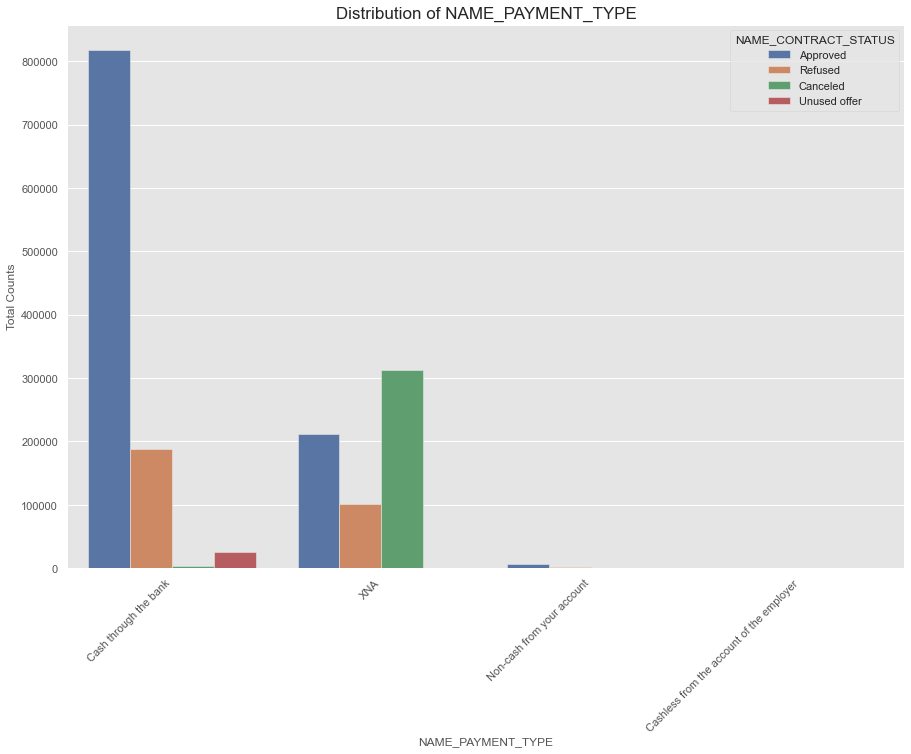

In [98]:
prev_count("NAME_PAYMENT_TYPE")

1.Majority of clients paid through cash through the bank option.

2.As we can observe from the above plotted graph "Non-cash from your account" and "Cashless from the account of employer",these options are not famous amongst the client.

In [99]:
# Numerical representaion of above graph
prev_appl.groupby(['NAME_PAYMENT_TYPE',"NAME_CONTRACT_STATUS"])["NAME_CONTRACT_STATUS"].count()

NAME_PAYMENT_TYPE                          NAME_CONTRACT_STATUS
Cash through the bank                      Approved                817174
                                           Canceled                  3190
                                           Refused                 187307
                                           Unused offer             25881
Cashless from the account of the employer  Approved                   862
                                           Canceled                    20
                                           Refused                    195
                                           Unused offer                 8
Non-cash from your account                 Approved                  6938
                                           Canceled                    35
                                           Refused                   1187
                                           Unused offer                33
XNA                                        Appro

## Checking Co-relations between columns

In [100]:
prev_corrs=prev_appl.corr()

<AxesSubplot:>

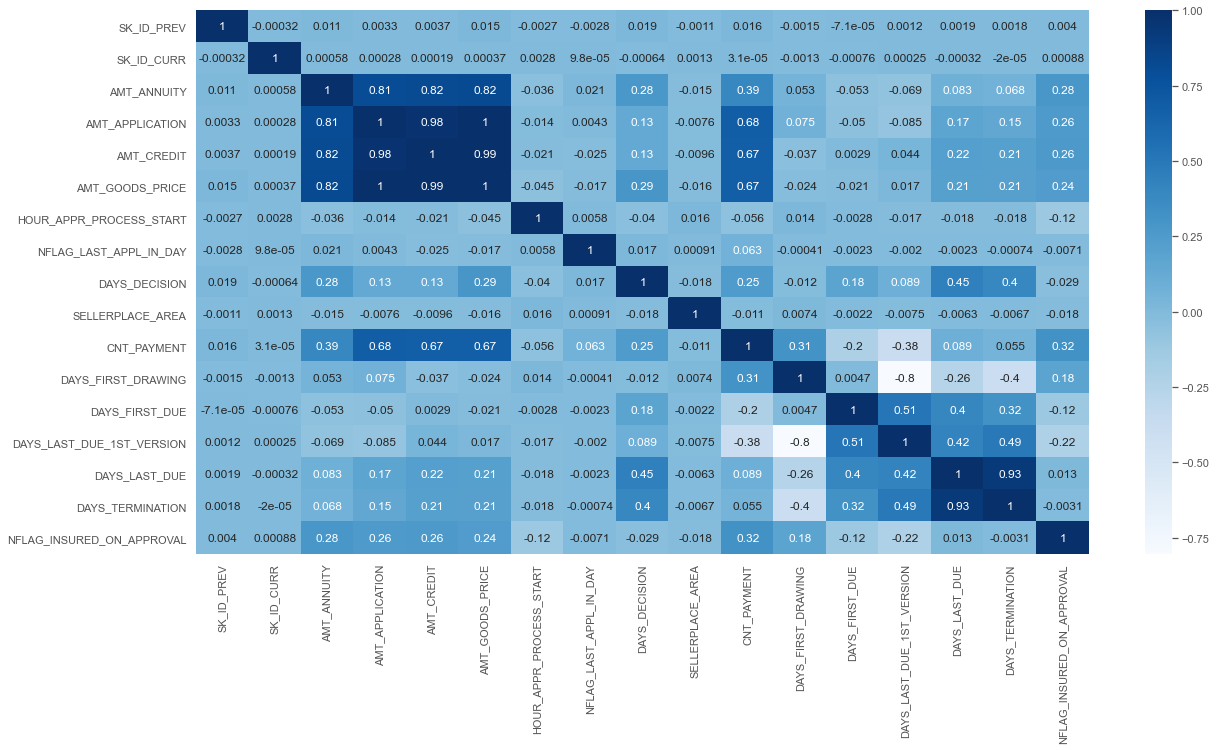

In [101]:
# Corelation for Previous Applicantion Data
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(prev_corrs,annot=True,cmap="Blues",annot_kws={'size': 12})

## Bivariate Analysis on numerical columns  using pairplot

<Figure size 1440x720 with 0 Axes>

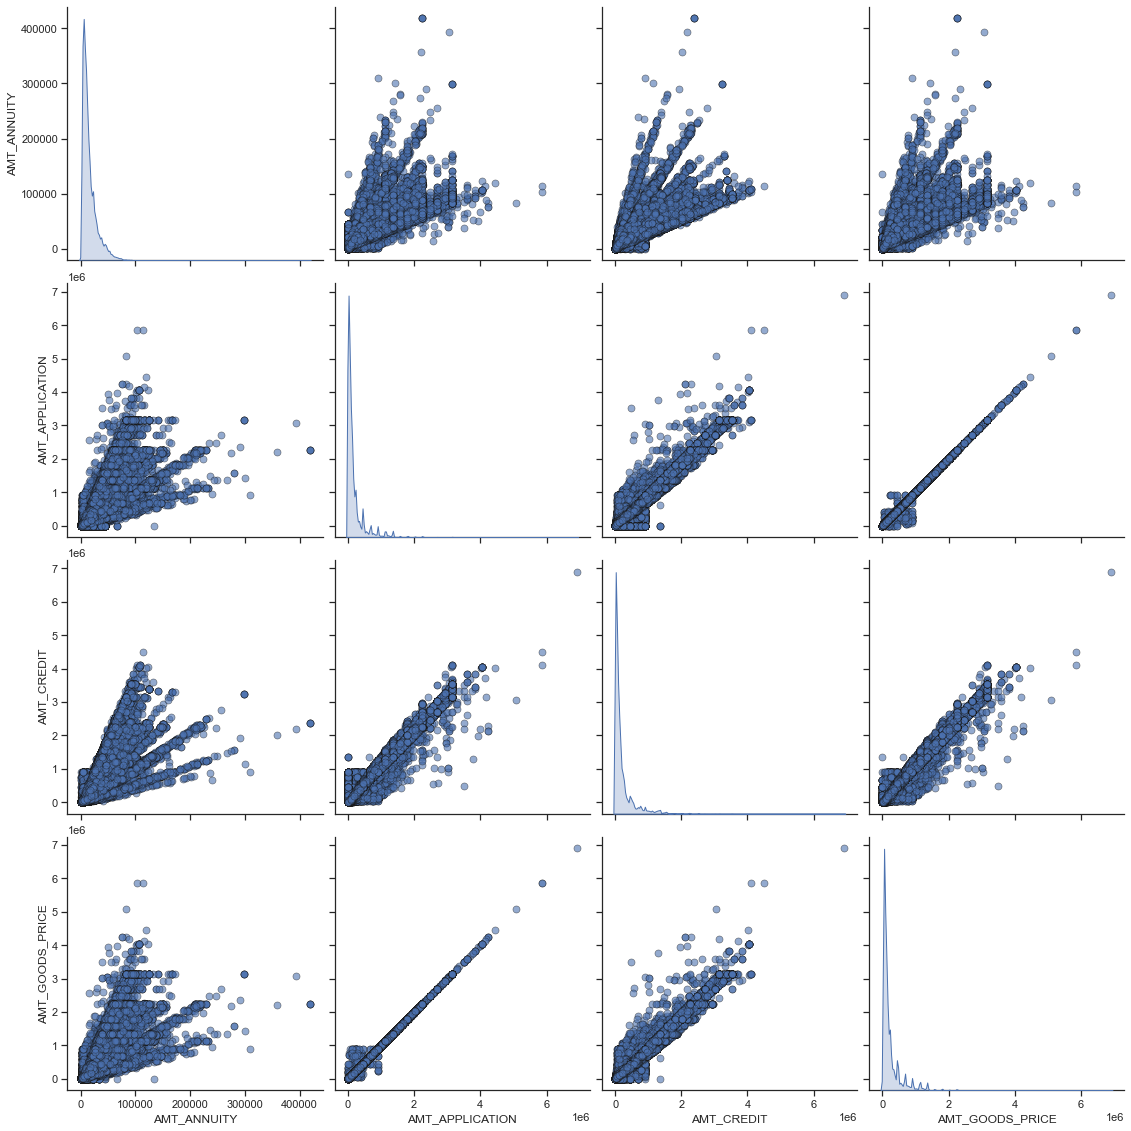

In [102]:
plt.figure(figsize=[20,10])
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)
sns.pairplot(prev_appl[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
             size = 4)
plt.show()

1.There is a strong linear relation between goods price and application amount.

2.The Amount of credit that the client asks for is highly dependent on goods price.

3.We can see there is positive relation between application amount and  credited amount.

## Bivariate Analysis of categorical vs Numerical columns

In [103]:
# Creating plot function to display graph for categorical variables vs numerical variables
def cat_box(ctg,nmr):
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    sns.boxenplot(x=ctg,y=nmr,data=prev_appl,palette="deep",)
    ax.set_xlabel(f'{ctg}')
    ax.set_ylabel(f'{nmr}')
    ax.set_title(f'{ctg} vs {nmr}',fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=360)
    plt.show()

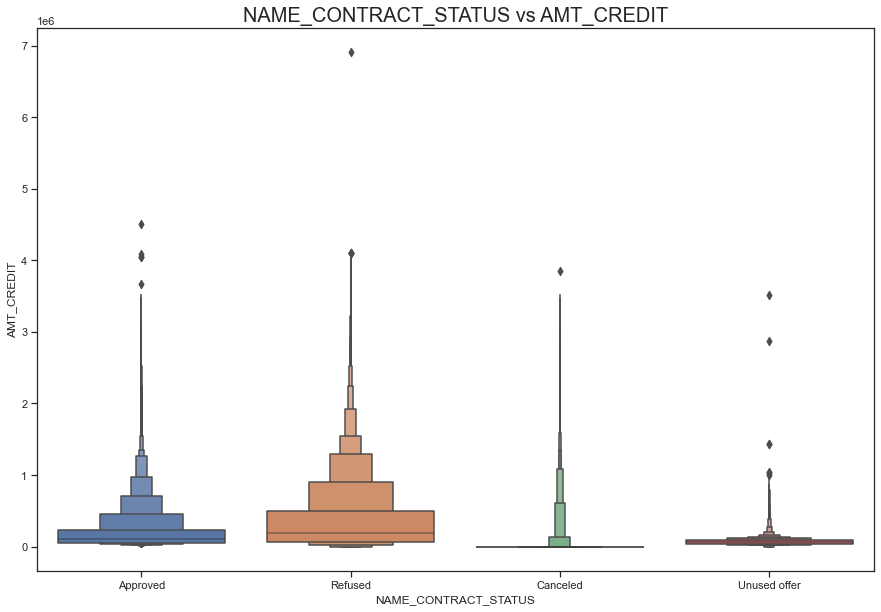

In [104]:
cat_box('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

As the credit amount goes low the offers are mostly unused and the loans are cancelled.

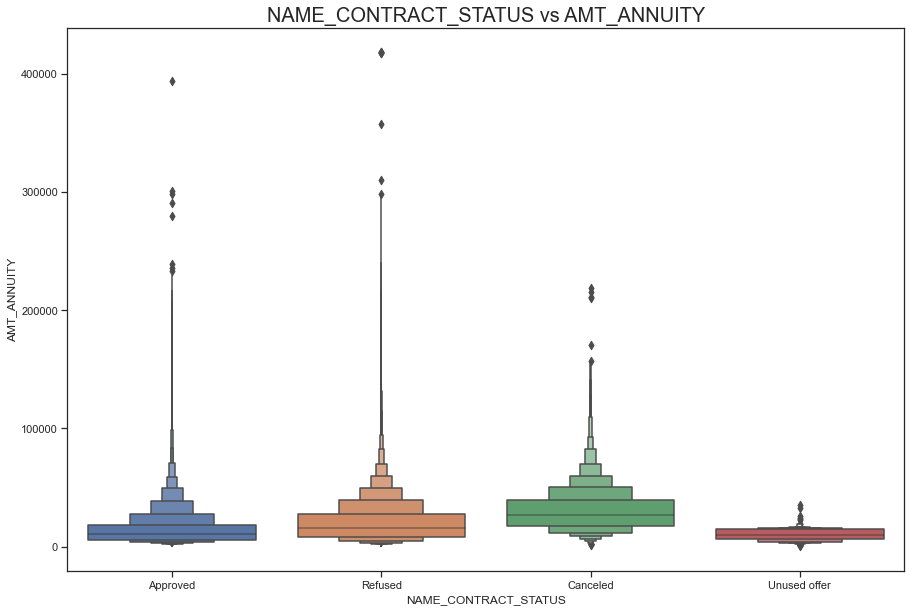

In [105]:
cat_box('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

As the annuity amount increases there are high chances of loan application refusal.

## Combining the dataframes of Appliction data and Previous Application 

In [106]:
combi=pd.merge(new_appl_1,prev_appl,how="left",on=["SK_ID_CURR"])

In [107]:
combi

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Income_Cohort,AGE_COHORT,AMT_CREDIT_x,AMT_INCOME_TOTAL,Credit_TotalInc_ Ratio,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,SOCIAL_DEF_30,SOCIAL_DEF_60,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,REGION_RATING_CLIENT,AMT_GOODS_PRICE_x,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,M,N,Y,High,"(20, 25]",406597.5,202500.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,-637,-3648.0,0,Laborers,1.0,2,Business Entity Type 3,1.0,1.0,0.0,0.0,0.0,Cash loans,24700.5,2,351000.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,F,N,N,Highest,"(40, 45]",1293502.5,270000.0,5.0,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,F,N,N,Highest,"(40, 45]",1293502.5,270000.0,5.0,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,F,N,N,Highest,"(40, 45]",1293502.5,270000.0,5.0,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,M,Y,Y,Lowest,"(50, 55]",135000.0,67500.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,-225,-4260.0,0,Laborers,1.0,2,Government,NaN,NaN,0.0,0.0,0.0,Revolving loans,6750.0,2,135000.0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,F,N,N,Medium,"(45, 50]",675000.0,157500.0,4.0,Commercial associate,Higher education,Married,House / apartment,-1262,-5128.0,0,Laborers,2.0,1,Business Entity Type 3,NaN,NaN,0.0,2.0,0.0,Cash loans,49117.5,1,675000.0,2073384.0

In [108]:
combi.shape

(1430155, 62)

In [109]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 62 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   CODE_GENDER                  1430155 non-null  object  
 3   FLAG_OWN_CAR                 1430155 non-null  object  
 4   FLAG_OWN_REALTY              1430155 non-null  object  
 5   Income_Cohort                1430155 non-null  category
 6   AGE_COHORT                   1430151 non-null  category
 7   AMT_CREDIT_x                 1430155 non-null  float64 
 8   AMT_INCOME_TOTAL             1430155 non-null  float64 
 9   Credit_TotalInc_ Ratio       1430155 non-null  float64 
 10  NAME_INCOME_TYPE             1430155 non-null  object  
 11  NAME_EDUCATION_TYPE          1430155 non-null  object  
 12  NAME_FAMILY_STATUS          

## Analysis on Combined DataFrames

In [110]:
# Creating BarPlot function to display graph for comparing variables
def combi_bar(v1,v2):
    combi_pivot=pd.pivot_table(data=combi,index=v1,columns=v2,values="SK_ID_CURR",aggfunc="count")
    combi_pivot=combi_pivot.div(combi_pivot.sum(axis=1),axis='rows')*100
    sns.set()
    combi_pivot.plot(kind="bar",stacked="True",figsize=[15,10],color=["green","orange","red","blue"])
    plt.title(f'effect of {v1} on Loan approval')
    plt.xlabel(f'{v1}')
    plt.ylabel(f'{v2}%')
    plt.xticks(rotation=360)
    plt.show()

## Analysis of Target variable against "NAME_CONTRACT_STATUS" 

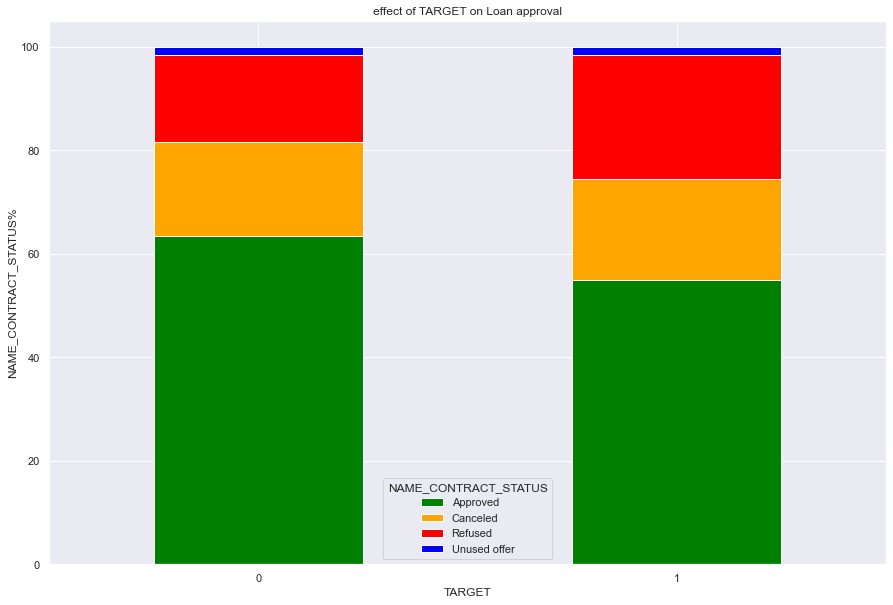

In [111]:
combi_bar('TARGET','NAME_CONTRACT_STATUS')

So we can observe from the ploted graph that the people whose loans were approved in previous applications those people tend to default less after the approval of current application.

## Analysis of "FLAG_OWN_CAR"  against  "NAME_CONTRACT_STATUS"

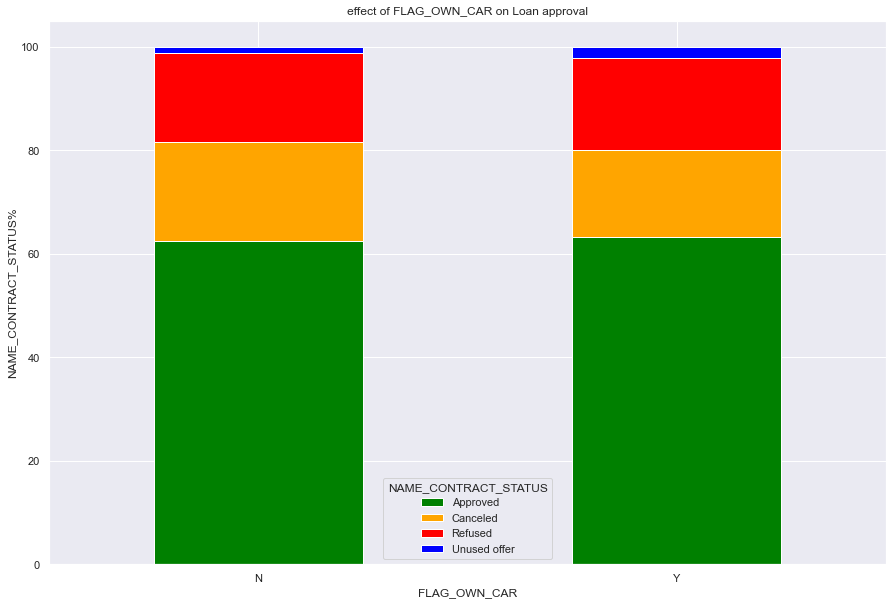

In [112]:
combi_bar('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

The People who own a car are not likely to use the offers.


## Analysis of "NAME_INCOME_TYPE" against "NAME_CONTRACT_STATUS" 


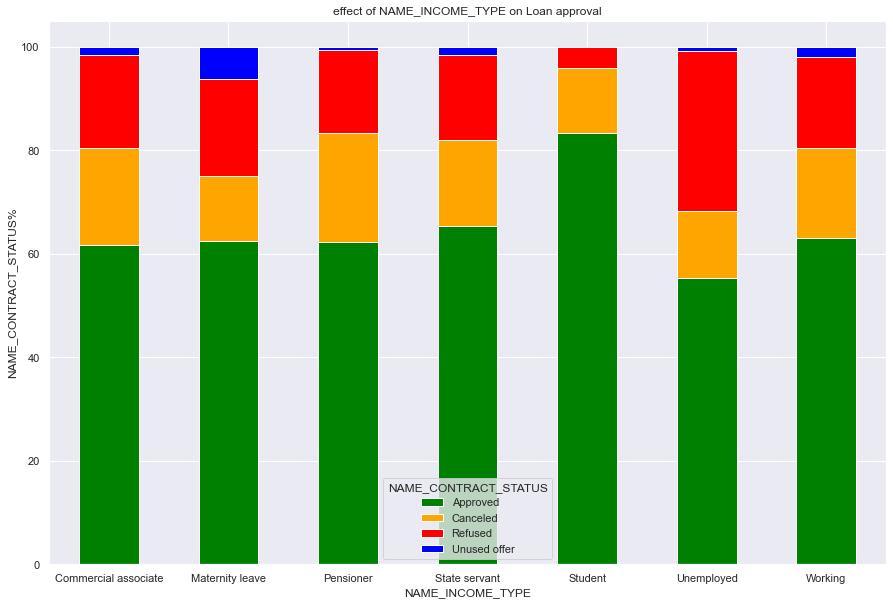

In [113]:
combi_bar('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS')

1.The Students loans have higher approval rate compared to other income type.

2.People who are on maternity leave have the most number of unused offers.

3.The rejection rate for the unemployed people is the most as observed from the above graph.